In [1]:
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  


In [2]:
data=np.loadtxt(os.path.join('Data','shopdata.txt'),delimiter=',')
X,Y=data[:,0],data[:,1]
m=Y.size
print(X.shape)
print(m)

(400,)
400


In [3]:
print("plotting data")
def plotdata(x,y):
    pyplot.plot(x,y,'ro', ms=10,mec='k')
    pyplot.xlabel("population in city")
    pyplot.ylabel("profit in the city")
    fig=pyplot.figure()

plotting data


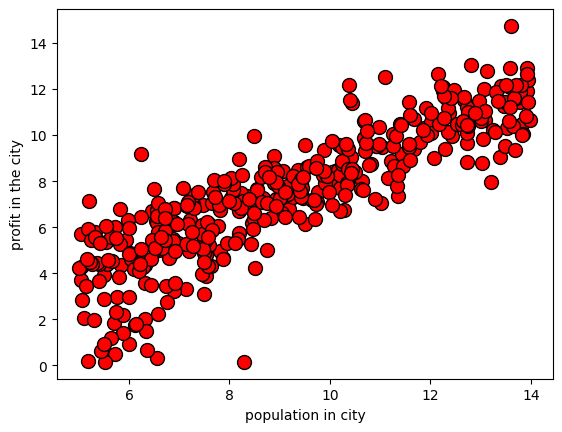

<Figure size 640x480 with 0 Axes>

In [4]:
plotdata(X,Y)

In [5]:
X=np.stack([np.ones(m),X],axis=1)
print(X.shape)

(400, 2)


In [6]:
theta=np.array([0.0,0.0])
print(theta.shape)

(2,)


In [7]:
print(theta)

[0. 0.]


In [8]:
def computerCost(x,y,theta):
    m=y.size
    J=0
    H=np.dot(x,theta)
    J = (1 / (2 * m)) * (sum(((H - y) ** 2)))
    return J

In [9]:
J=computerCost(X,Y,theta=np.array([0,2]))

In [10]:
print(J)

63.542865702724995


In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]                     
    theta = theta.copy()              
    J_history = []                     

    for i in range(num_iters):
        H = np.dot(X, theta)                      
        diff = np.dot(np.transpose(X), (H - y))               
        theta = theta - (alpha* (1/ m) * diff)       
        J_history.append(computerCost(X, y, theta))  

    return theta, J_history


In [12]:
theta=np.zeros(2)
alpha=0.01
num_iters=1500
theta,J_history=gradientDescent(X, Y, theta, alpha, num_iters)

In [13]:
print("Theta values: θ0 = {:.4f}, θ1 = {:.4f}".format(*theta))


Theta values: θ0 = -0.7079, θ1 = 0.8958


In [14]:
print(X[:,1])

[ 6.5479  7.5386  5.0365 10.274   5.1077  5.7292  5.1884  6.3557  9.7687
  6.5159  8.5172  9.1802  6.002   5.5204  5.0594  5.7077  7.6366  5.8707
  5.3054  8.2934 13.394   5.4369  7.1421  6.3243  5.7687  7.8754  6.8931
  6.1224  8.4533  7.5248  9.2741  6.7283  8.1842  6.5673  5.8841  7.4625
  9.0432  6.9146  5.7393  7.8124  8.9267  6.3452  5.6423  7.9584 10.3841
  5.4983  6.7612  8.1624  7.4852  6.1287  8.1836 13.0811 11.2219 10.0886
  6.3262  6.326   5.4937 12.3625 10.1095 11.0186  5.175  13.2442 12.0758
  6.8049  6.5455  6.5589  7.5861  9.4604  8.6715  7.4754 10.2007  6.1857
  7.4832  8.1141  8.8766 11.674   6.6972  9.371  10.0355  5.3948 10.1641
  6.4495  5.5529 13.0655 13.2079 11.8714  7.5892  5.8302 10.816   8.7413
  6.0373  9.209   5.2923 12.7292  7.1996 10.6314  7.6495  9.4206  9.647
  6.5713  9.8906  7.5053  8.8207 12.603   5.0425  6.0941 11.0367 12.4327
  6.2304 10.1758 13.0219  6.8828  6.668   5.9754  6.9773 13.8076 12.3051
  6.5475 12.346   7.4667  8.8853 13.4603 12.3588  8.

In [15]:
print(Y)

[ 0.2968  3.8845  5.7014  6.7526  2.0576  0.4795  0.2042  0.6786  7.5435
  5.3436  4.2415  6.7981  0.927   0.152   2.8214  1.8451  4.2959  2.2029
  1.9869  0.1445  9.0551  0.617   3.304   2.005   2.9526  4.6783  3.2158
  1.7532  6.1923  4.8031  7.3044  3.4289  5.7413  2.2391  1.3827  3.9516
  6.6071  3.5739  2.3285  4.9846  7.2185  1.4852  1.2024  5.3157  8.2092
  0.9423  2.7286  5.4841  3.1076  1.7893  7.2853 10.6362  8.8619  7.7698
  3.5824  4.3409  3.9343 10.9471  8.4312  7.0519  4.4641 10.2103  8.9837
  6.0556  6.2674  6.1784  5.2296  7.2591  7.2685  6.9559  7.6814  4.7629
  4.8802  5.2951  7.9138 10.6954  5.2858  8.5003  8.3901  3.6707  8.4927
  6.6976  4.4065 12.0171  7.9466 10.319   6.1584  4.3652  8.7445  5.0055
  4.6102  7.7243  5.7117  9.6651  4.9512  8.0034  7.035   7.8652  7.1879
  5.7703  9.36    5.3962  6.403  10.4712  3.691   4.1972  9.4695  9.965
  6.4214  9.5765  8.7995  5.5022  5.5037  6.2957  5.3038 11.4615 11.6068
  6.7253 11.1963  5.0628  9.0748 11.2613 10.1289  7.

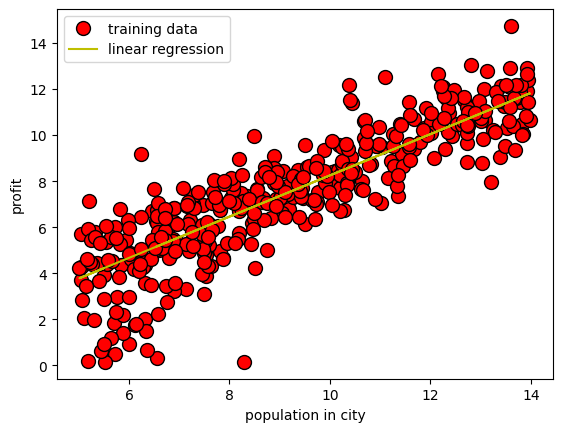

<Figure size 640x480 with 0 Axes>

In [16]:
pyplot.plot(X[:,1],Y,'ro',ms=10,mec='k')
pyplot.xlabel('population in city')
pyplot.ylabel('profit')
pyplot.plot(X[:,1],np.dot(X,theta),'-y')
pyplot.legend(['training data','linear regression'])
fig=pyplot.figure()

In [17]:
print(theta)

[-0.70786119  0.89578874]


In [18]:
predict1=np.dot([1,6.23],theta)

In [19]:
print('{:.2f}'.format(predict1))

4.87
